## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest


## 2. Read the Training Data

In [2]:
file_path=r"D:\DS_ML\Flight-AWS_sagemaker_project\Data\train.csv"

train=pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-27,Delhi,Cochin,20:55:00,12:35:00,940,1,In-flight meal not included,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,18:55:00,16:20:00,1285,1,No Info,13044
2,Air India,2019-05-18,Delhi,Cochin,09:45:00,09:25:00,1420,2,No Info,10975
3,Indigo,2019-06-03,Mumbai,Hyderabad,21:20:00,22:50:00,90,0,No Info,2227
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,02:55:00,04:20:00,85,0,No Info,5678
...,...,...,...,...,...,...,...,...,...,...
6689,Spicejet,2019-06-09,Kolkata,Banglore,11:35:00,18:50:00,435,1,No Info,8479
6690,Multiple Carriers,2019-05-09,Delhi,Cochin,10:00:00,01:30:00,930,1,No Info,15078
6691,Air India,2019-05-18,Delhi,Cochin,12:00:00,07:40:00,1180,2,No Info,8603
6692,Air Asia,2019-05-18,Delhi,Cochin,07:55:00,13:25:00,330,1,No Info,8759


In [3]:
train.dtypes

airline            object
date_of_journey    object
source             object
destination        object
dep_time           object
arrival_time       object
duration            int64
total_stops         int64
additional_info    object
price               int64
dtype: object

In [4]:
train=train.assign(**{
    col: pd.to_datetime(train.loc[:,col],dayfirst=True)
    for col in ["date_of_journey","dep_time","arrival_time"]
})

In [5]:
train.dtypes


airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops                 int64
additional_info            object
price                       int64
dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6694 non-null   object        
 1   date_of_journey  6694 non-null   datetime64[ns]
 2   source           6694 non-null   object        
 3   destination      6694 non-null   object        
 4   dep_time         6694 non-null   datetime64[ns]
 5   arrival_time     6694 non-null   datetime64[ns]
 6   duration         6694 non-null   int64         
 7   total_stops      6694 non-null   int64         
 8   additional_info  6694 non-null   object        
 9   price            6694 non-null   int64         
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 523.1+ KB


In [7]:
train.describe(include="number")

,duration,total_stops,price
count,6694.000000,6694.000000,6694.000000
mean,637.633702,0.812668,9092.553331
std,504.395941,0.658143,4670.489223
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5277.000000
50%,515.000000,1.000000,8372.000000
75%,925.000000,1.000000,12373.000000
max,2860.000000,3.000000,79512.000000


In [8]:
(
    train
    .assign(total_stops=train['total_stops'].astype(object))
    )

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-27,Delhi,Cochin,2024-05-20 20:55:00,2024-05-20 12:35:00,940,1,In-flight meal not included,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,2024-05-20 18:55:00,2024-05-20 16:20:00,1285,1,No Info,13044
2,Air India,2019-05-18,Delhi,Cochin,2024-05-20 09:45:00,2024-05-20 09:25:00,1420,2,No Info,10975
3,Indigo,2019-06-03,Mumbai,Hyderabad,2024-05-20 21:20:00,2024-05-20 22:50:00,90,0,No Info,2227
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,2024-05-20 02:55:00,2024-05-20 04:20:00,85,0,No Info,5678
...,...,...,...,...,...,...,...,...,...,...
6689,Spicejet,2019-06-09,Kolkata,Banglore,2024-05-20 11:35:00,2024-05-20 18:50:00,435,1,No Info,8479
6690,Multiple Carriers,2019-05-09,Delhi,Cochin,2024-05-20 10:00:00,2024-05-20 01:30:00,930,1,No Info,15078
6691,Air India,2019-05-18,Delhi,Cochin,2024-05-20 12:00:00,2024-05-20 07:40:00,1180,2,No Info,8603
6692,Air Asia,2019-05-18,Delhi,Cochin,2024-05-20 07:55:00,2024-05-20 13:25:00,330,1,No Info,8759


## 4. High-level analysis of Missing Values


In [9]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


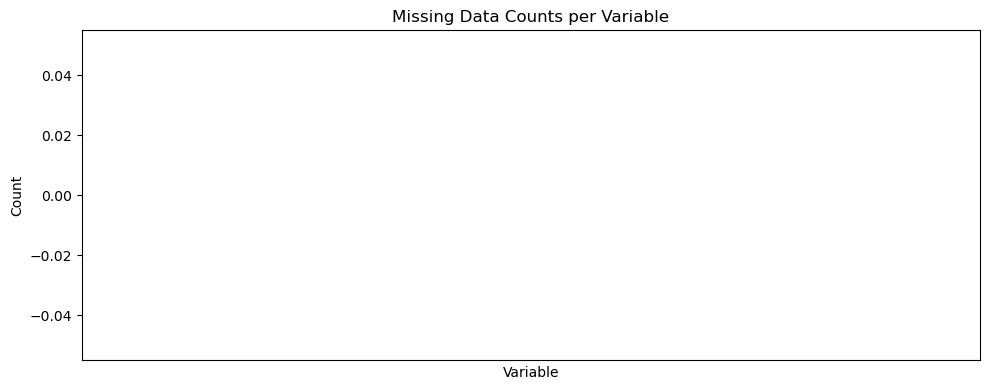

In [10]:
eda_helper_functions.plot_missing_info(train)

In [11]:
train[train['total_stops'].isna()==True]

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price


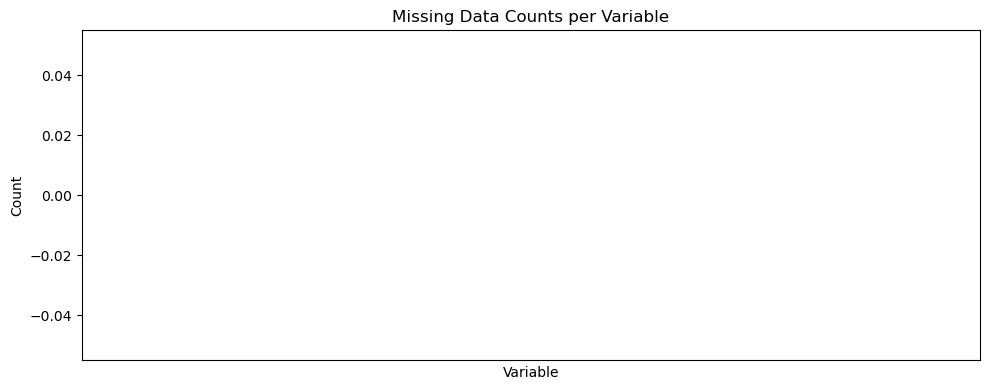

In [12]:
eda_helper_functions.plot_missing_info(train)

## High-Level anlysis of Outliers

In [13]:
forest=IsolationForest(n_estimators=10,random_state=42)

In [14]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                       .drop(columns="price")
                                       .select_dtypes(include="number")))
    .query("outlier==-1")
    .duration
    .describe()
)

count    2532.000000
mean      917.869273
std       650.450283
min        75.000000
25%       145.000000
50%      1145.000000
75%      1475.000000
max      2860.000000
Name: duration, dtype: float64

## 6. Pair Plots

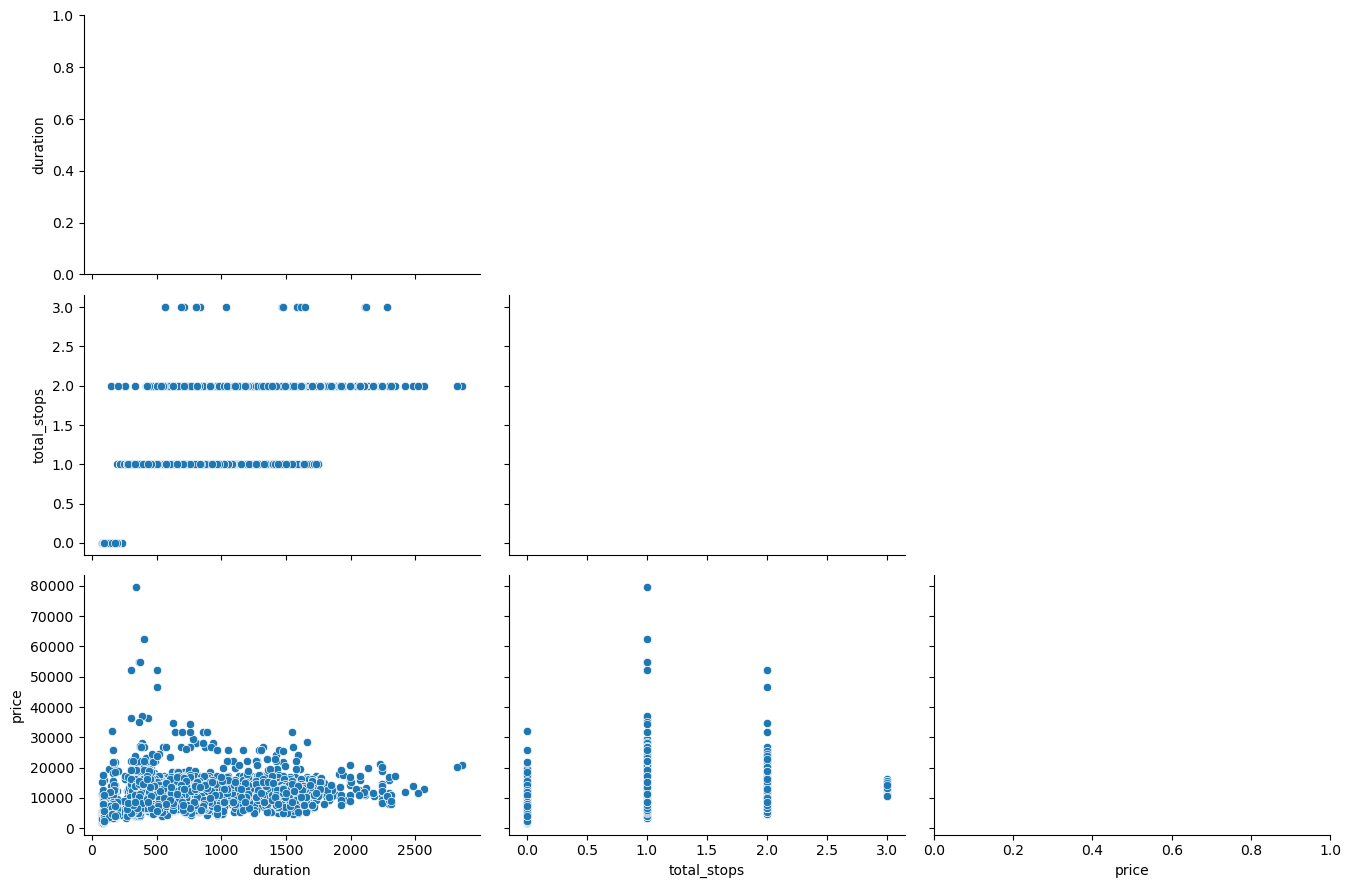

In [15]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

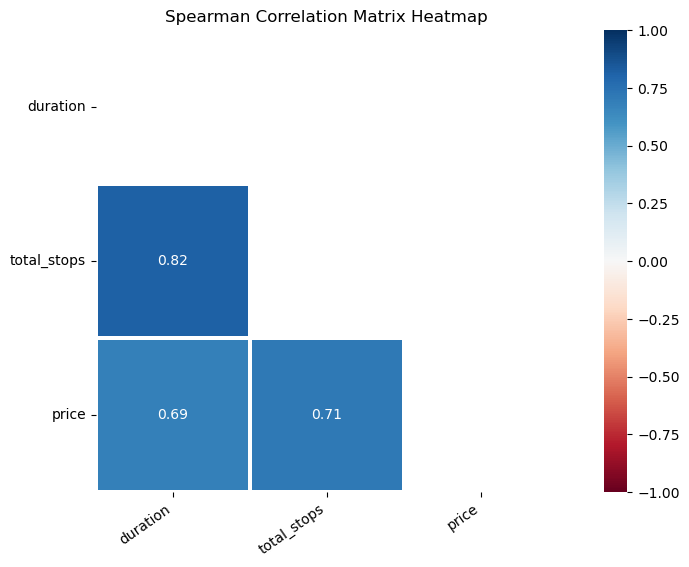

In [16]:
eda_helper_functions.correlation_heatmap(train)

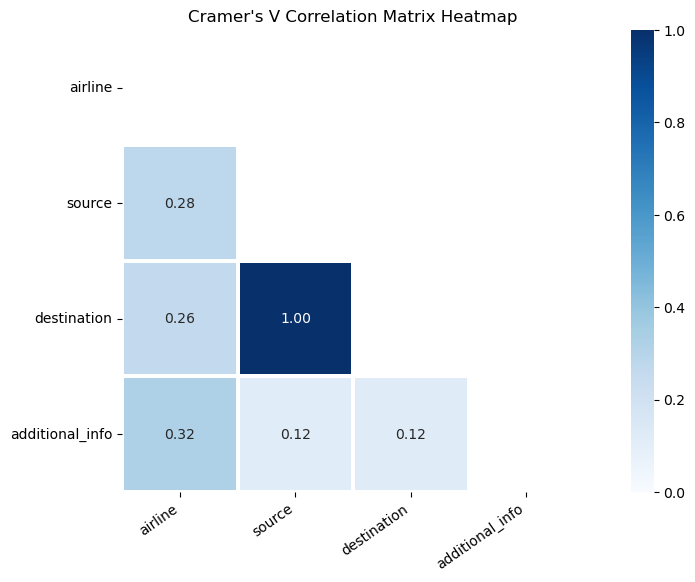

In [17]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [18]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 Airline

In [19]:
train.airline


0             Jet Airways
1             Jet Airways
2               Air India
3                  Indigo
4             Jet Airways
              ...        
6689             Spicejet
6690    Multiple Carriers
6691            Air India
6692             Air Asia
6693    Multiple Carriers
Name: airline, Length: 6694, dtype: object

In [20]:
eda_helper_functions.cat_summary(train,"airline")

0             Jet Airways
1             Jet Airways
2               Air India
3                  Indigo
4             Jet Airways
              ...        
6689             Spicejet
6690    Multiple Carriers
6691            Air India
6692             Air Asia
6693    Multiple Carriers
Name: airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,9
top,Jet Airways
freq,2387


,count,percentage
category,,
Jet Airways,2387,0.356588
Indigo,1281,0.191365
Air India,1087,0.162384
Multiple Carriers,768,0.114730
Spicejet,534,0.079773
Vistara,301,0.044966
Air Asia,215,0.032118
Goair,120,0.017927
Trujet,1,0.000149


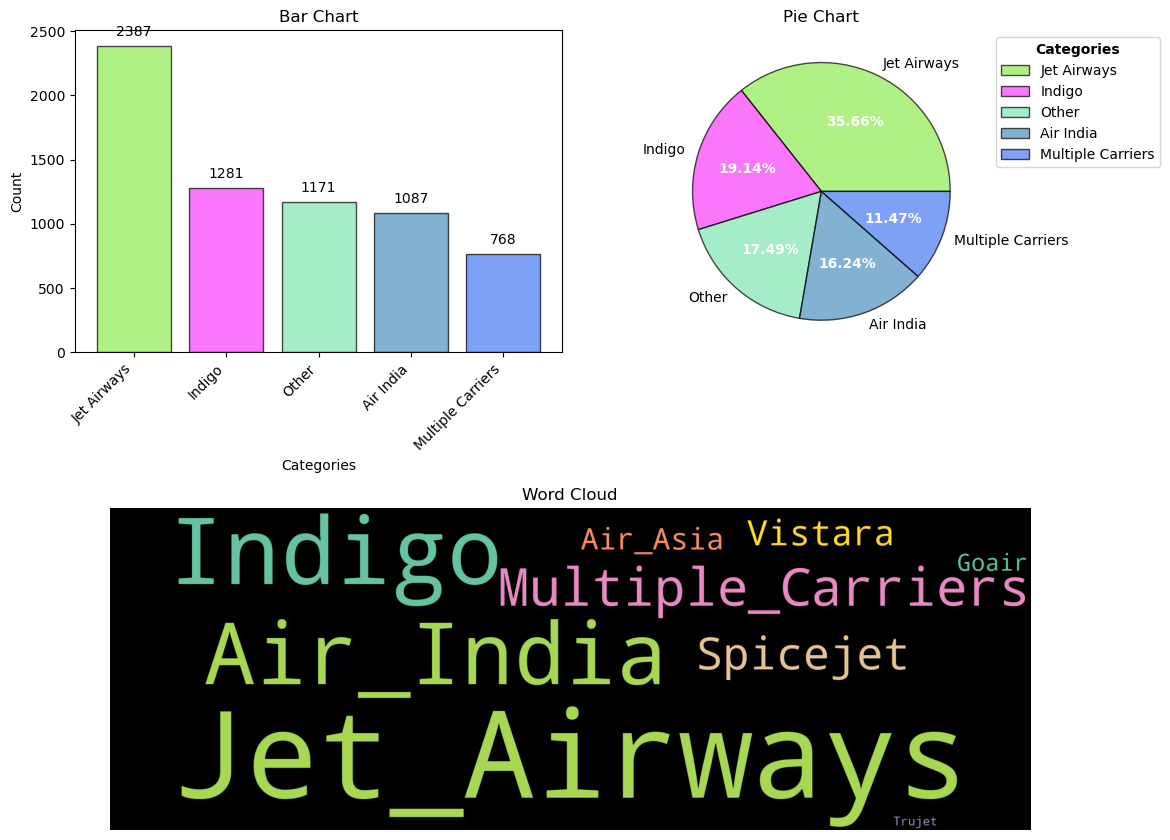

In [21]:
eda_helper_functions.cat_univar_plots(train,"airline",k=4)

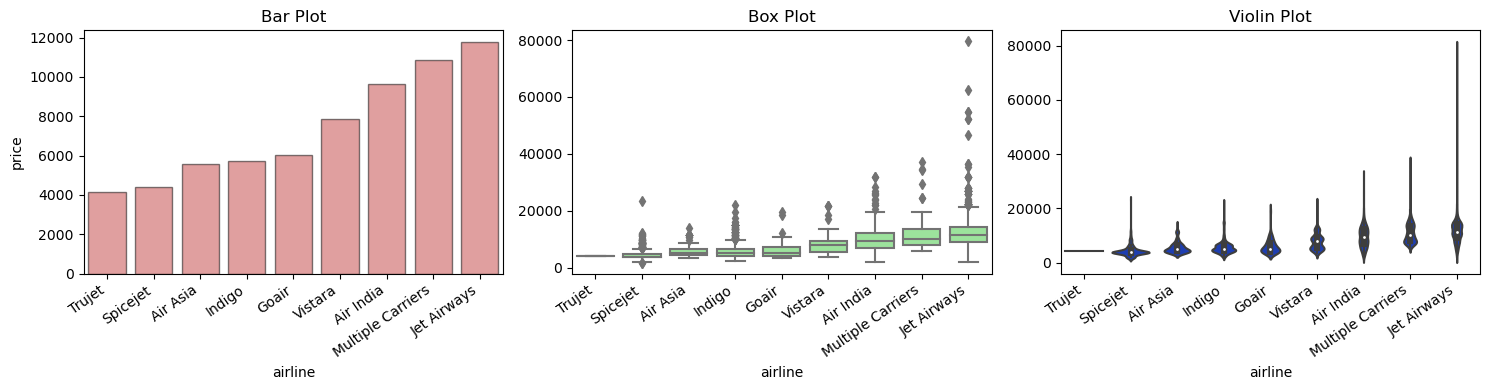

In [22]:
eda_helper_functions.num_cat_bivar_plots(train,num_var="price",cat_var="airline")

In [23]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 446.0707433362749
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3062.6099595740966
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


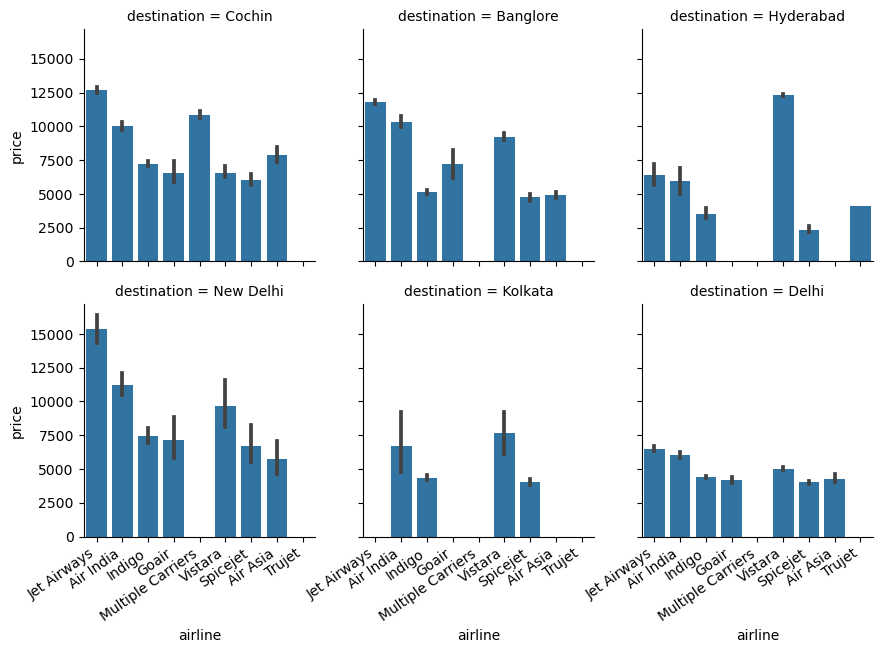

In [24]:
airline_grid=sns.FacetGrid(train,col="destination",col_wrap=3,sharey=True)
airline_grid.map(sns.barplot,"airline","price",order=train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2 Date of journey

In [25]:
train.date_of_journey

0      2019-05-27
1      2019-06-12
2      2019-05-18
3      2019-06-03
4      2019-04-01
          ...    
6689   2019-06-09
6690   2019-05-09
6691   2019-05-18
6692   2019-05-18
6693   2019-04-09
Name: date_of_journey, Length: 6694, dtype: datetime64[ns]

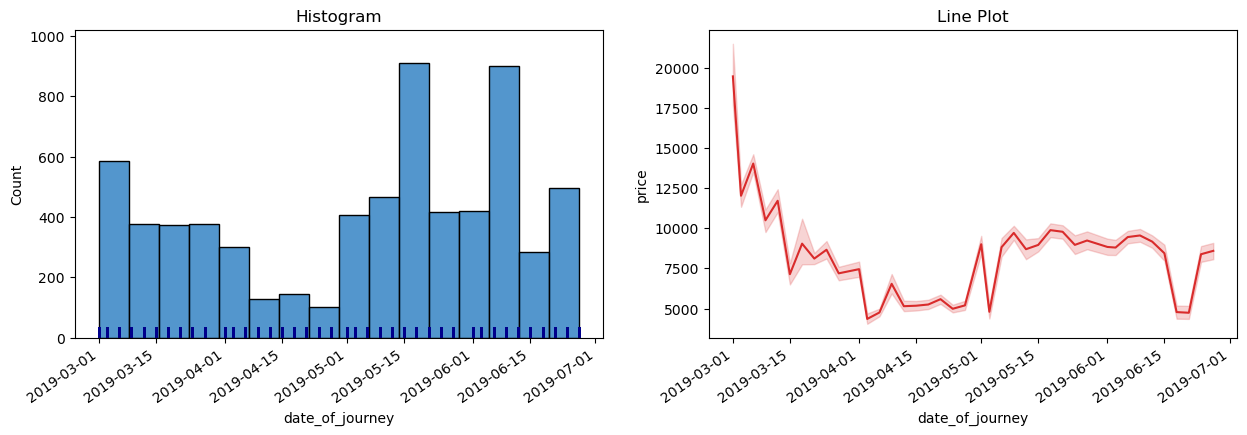

In [26]:
eda_helper_functions.dt_univar_plots(train,var="date_of_journey",target="price")

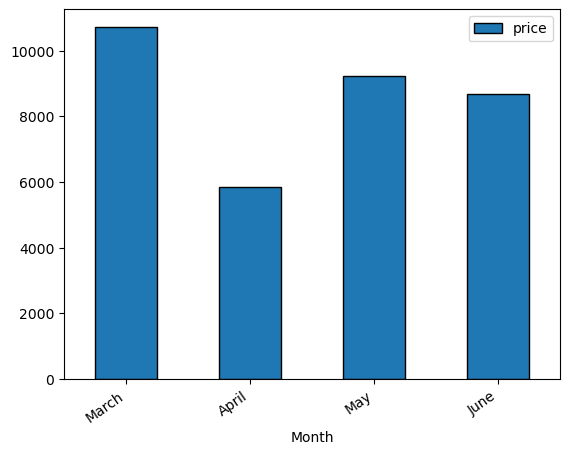

In [27]:
(
train
.groupby(pd.Grouper(key="date_of_journey",freq="M"))
.price.mean()
.to_frame()
.set_axis(["March","April","May","June"])
.rename_axis(index="Month")
.plot(kind="bar",
     edgecolor="black"))

ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

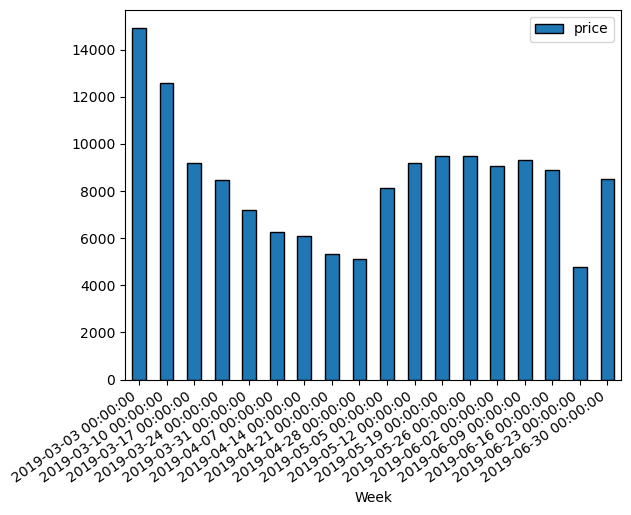

In [28]:
(
train
.groupby(pd.Grouper(key="date_of_journey",freq="W"))
.price.mean()
.to_frame()

.rename_axis(index="Week")
.plot(kind="bar",
     edgecolor="black"))

ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

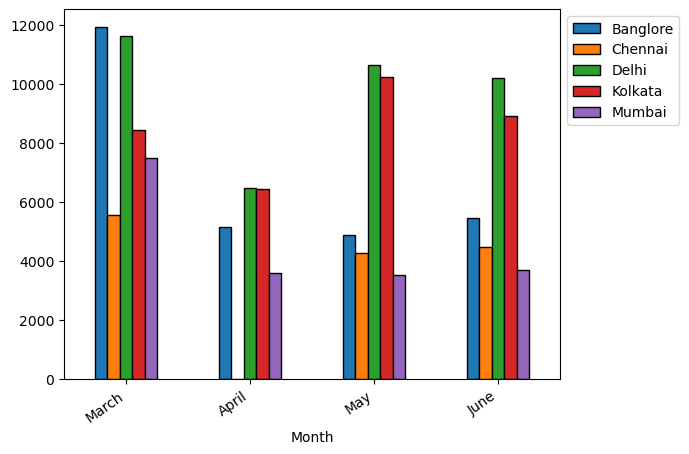

In [29]:
(
train
.groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])
.price.mean()
.unstack(fill_value=0)
.set_axis(["March","April","May","June"])
.rename_axis(index="Month")
.plot(kind="bar",
     edgecolor="black")
)
ax=plt.gca()

ax.legend(loc="upper left"
         ,bbox_to_anchor=(1,1))

eda_helper_functions.rotate_xlabels(ax)

### 8.3 Dep Time

In [30]:
train.dep_time

0      2024-05-20 20:55:00
1      2024-05-20 18:55:00
2      2024-05-20 09:45:00
3      2024-05-20 21:20:00
4      2024-05-20 02:55:00
               ...        
6689   2024-05-20 11:35:00
6690   2024-05-20 10:00:00
6691   2024-05-20 12:00:00
6692   2024-05-20 07:55:00
6693   2024-05-20 08:00:00
Name: dep_time, Length: 6694, dtype: datetime64[ns]

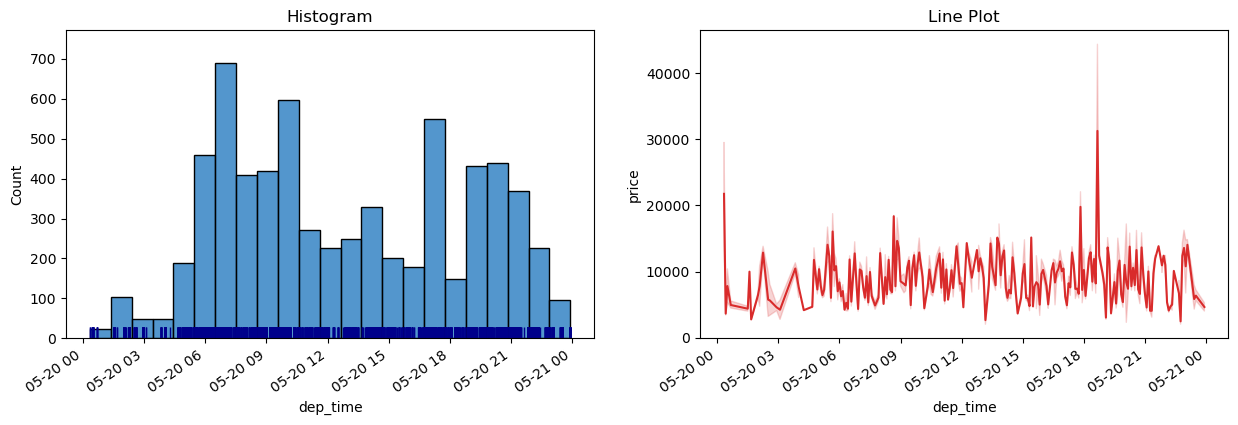

In [31]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

In [32]:
(
    train
    .dep_time
    .dt.hour
    .pipe(lambda ser:pd.Series( np.select([ser.between(4,12,inclusive="left"),
                                   ser.between(12,16,inclusive="left"),
                                   ser.between(16,20,inclusive="left")],
                                   ["morning",
                                   "afternoon",
                                   "evening"],
                                   default="night")))
)

0           night
1         evening
2         morning
3           night
4           night
          ...    
6689      morning
6690      morning
6691    afternoon
6692      morning
6693      morning
Length: 6694, dtype: object

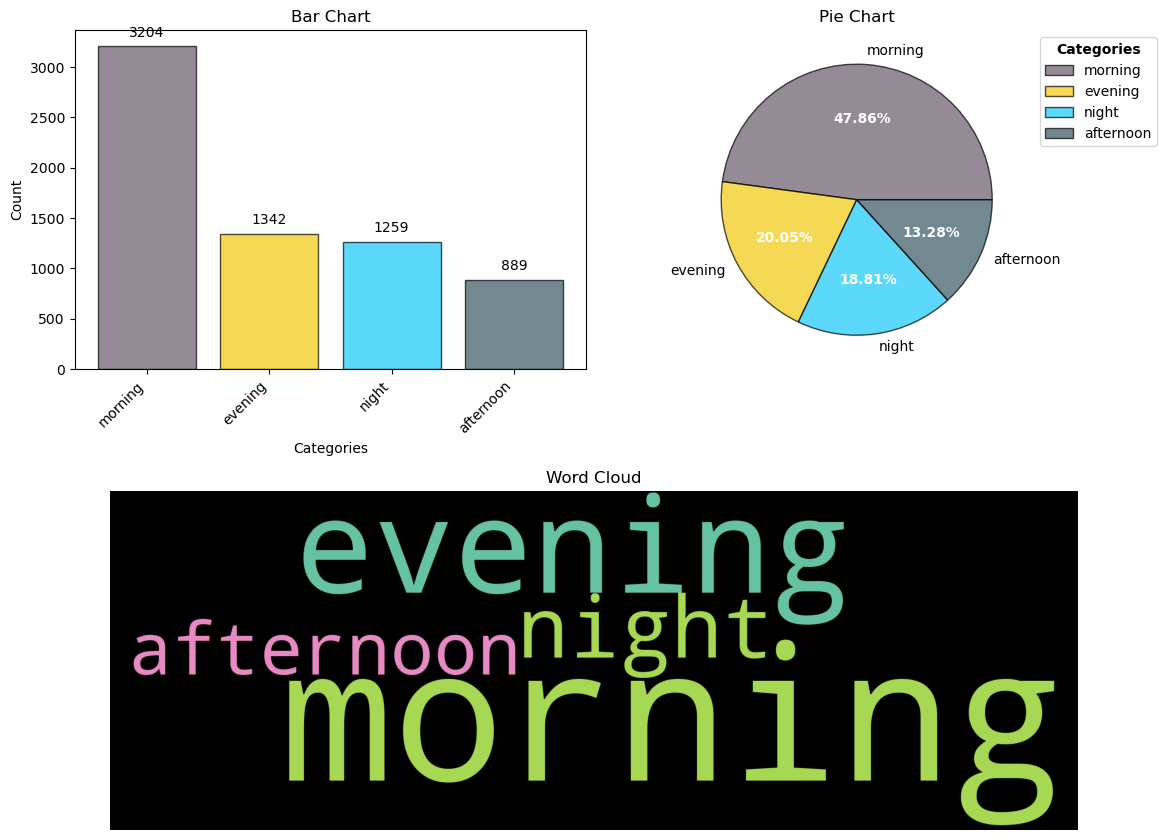

In [33]:
(
train
.assign(dep_time=lambda df_:(
     np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                ["morning", "afternoon","evening"],
                default="night")
))
.pipe(eda_helper_functions.cat_univar_plots,"dep_time"))

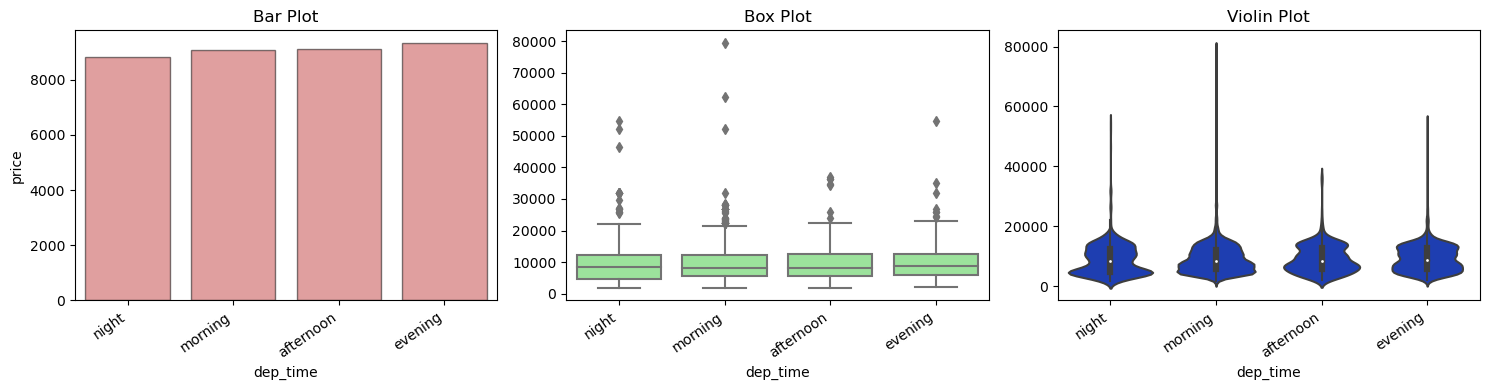

In [34]:
(
train
.assign(dep_time=lambda df_:(
     np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                ["morning", "afternoon","evening"],
                default="night")
))
.pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time"))

### 8.4 duration

In [35]:
train.duration

0        940
1       1285
2       1420
3         90
4         85
        ... 
6689     435
6690     930
6691    1180
6692     330
6693     660
Name: duration, Length: 6694, dtype: int64

In [36]:
eda_helper_functions.num_summary(train,"duration")

0        940
1       1285
2       1420
3         90
4         85
        ... 
6689     435
6690     930
6691    1180
6692     330
6693     660
Name: duration, Length: 6694, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,515.00
75,925.00
90,1443.50
95,1596.75
99,1925.00


,value
mean,637.633702
trimmed mean (5%),603.744607
trimmed mean (10%),575.500373
median,515.000000


,value
var,254415.264879
std,504.395941
IQR,755.000000
mad,345.000000
coef_variance,0.791043


,value
skewness,0.902919
kurtosis,-0.006774


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8882866501808167
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 242.1831336451669
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


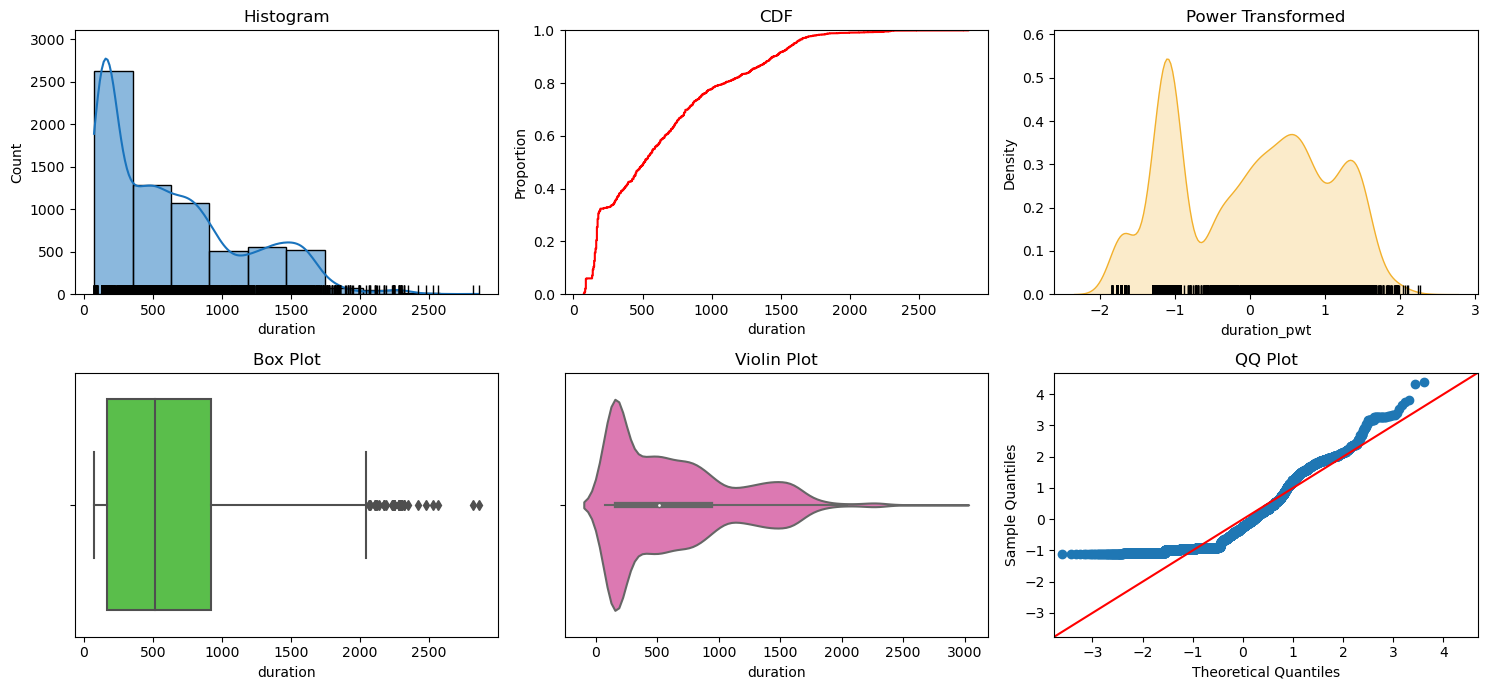

In [37]:
eda_helper_functions.num_univar_plots(train,"duration")

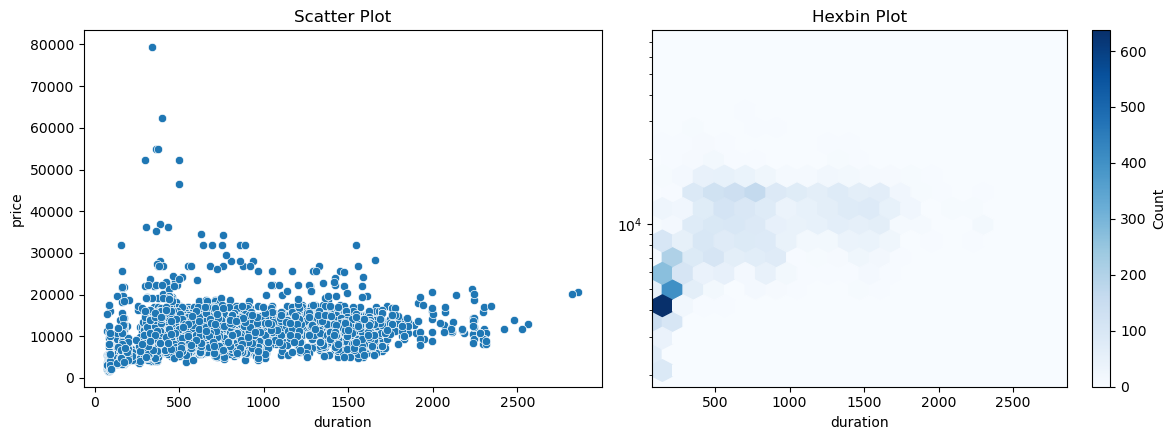

In [38]:
eda_helper_functions.num_bivar_plots(train,"duration","price",
                                     hexbin_kwargs=dict(
                                            yscale="log",gridsize=20,cmap="Blues"
                                     ))

In [39]:
eda_helper_functions.num_num_hyp_testing(train,"price","duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4883580202726635
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.685936761630648
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


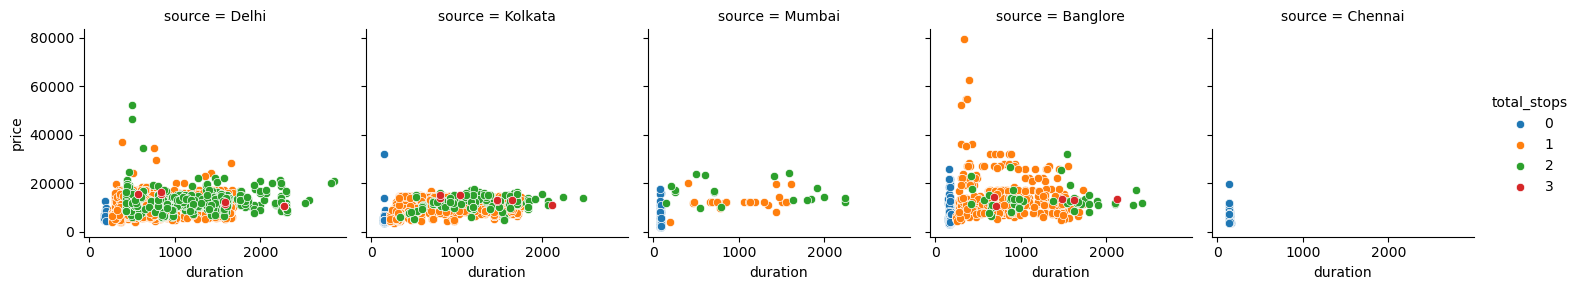

In [40]:
duration_grid=sns.FacetGrid(
        data=train,
    col="source",
    sharey=True,
    hue="total_stops"
)
duration_grid.map(sns.scatterplot,"duration","price")
duration_grid.add_legend()

In [41]:
eda_helper_functions.get_iqr_outliers(train,"duration")

Lower Limit : -962.5
Upper Limit : 2057.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
271,Air India,2019-05-15,Kolkata,Banglore,2024-05-20 05:50:00,2024-05-20 16:15:00,2065,2,No Info,12723
3687,Air India,2019-05-01,Kolkata,Banglore,2024-05-20 05:50:00,2024-05-20 16:15:00,2065,2,No Info,10991
6076,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-20 17:55:00,2024-05-20 04:25:00,2070,2,No Info,17072
3223,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-20 17:55:00,2024-05-20 04:25:00,2070,2,In-flight meal not included,15812
1503,Air India,2019-03-18,Banglore,New Delhi,2024-05-20 11:05:00,2024-05-20 22:10:00,2105,2,No Info,11161
1346,Air India,2019-03-03,Banglore,New Delhi,2024-05-20 11:05:00,2024-05-20 22:10:00,2105,2,No Info,11948
2988,Air India,2019-03-03,Banglore,New Delhi,2024-05-20 11:05:00,2024-05-20 22:10:00,2105,2,No Info,11791
730,Air India,2019-05-12,Kolkata,Banglore,2024-05-20 12:00:00,2024-05-20 23:15:00,2115,3,No Info,10991
2743,Air India,2019-03-12,Banglore,New Delhi,2024-05-20 06:45:00,2024-05-20 18:05:00,2120,3,No Info,13387
1138,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-20 16:50:00,2024-05-20 04:25:00,2135,2,No Info,19907


## Automated EDA

ImportError: Numba needs NumPy 1.24 or less

NameError: name 'ProfileReport' is not defined

1.26.3
